In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR, LinearSVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### clus0

In [ ]:
#read the file
train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_raw_0.csv').drop(columns=['대여 대여소번호'])
vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_raw_0.csv').drop(columns=['대여 대여소번호'])
test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_raw_0.csv').drop(columns=['대여 대여소번호'])

In [ ]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [ ]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [ ]:
weather_train.shape

(580, 9)

In [ ]:
weather_vali.shape

(151, 9)

In [ ]:
weather_test.shape

(30, 9)

In [ ]:
weather_train['일자'] = weather_train['일자'].astype(str)
weather_vali['일자'] = weather_vali['일자'].astype(str)
weather_test['일자'] = weather_test['일자'].astype(str)

In [ ]:
final1_train = pd.merge(train, weather_train, how='left', on='일자').drop(columns='Unnamed: 0')

In [ ]:
final1_val = vali.drop(columns=['Unnamed: 0', 'clus'])
final1_test = test.drop(columns=['Unnamed: 0', 'clus'])
final1_test

,일자,대여수,습도,풍속,하늘상태,강수형태,강수확률,일최고기온,일최저기온,winter
0,2021-06-01,137,72.668919,1.845270,3,0,23.932432,26.263158,18.125,0
1,2021-06-02,183,77.567568,1.429730,3,0,25.972973,23.631579,16.750,0
2,2021-06-03,47,73.716216,1.247973,2,0,5.743243,24.947368,16.000,0
3,2021-06-04,172,71.317568,1.499324,2,0,5.810811,27.368421,17.375,0
4,2021-06-05,175,71.925676,1.758108,3,0,15.810811,28.526316,18.125,0
...,...,...,...,...,...,...,...,...,...,...
1015,2021-06-26,342,74.324324,1.865541,2,0,11.418919,30.052632,21.500,0
1016,2021-06-27,348,71.756757,1.710811,3,0,17.229730,29.789474,21.625,0
1017,2021-06-28,296,71.993243,1.403378,2,0,14.256757,29.684211,21.875,0
1018,2021-06-29,249,70.709459,1.623649,2,0,18.918919,30.842105,21.750,0


In [ ]:
final1_train = pd.concat([final1_train, final1_val[final1_val['일자']<'2021-05-01']])
final1_val = final1_val[final1_val['일자']>='2021-05-01']

In [ ]:
print(final1_train.shape)
print(final1_val.shape)
print(final1_test.shape)

(23766, 10)
(1054, 10)
(1020, 10)


In [ ]:
final1_train = final1_train.drop(columns = ['일자'])
final1_val = final1_val.drop(columns = ['일자'])
final1_test = final1_test.drop(columns = ['일자'])

In [ ]:
y_train = final1_train['대여수']
X_train = final1_train.drop('대여수',axis=1, inplace=False)

y_vali = final1_val['대여수']
X_vali = final1_val.drop('대여수',axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

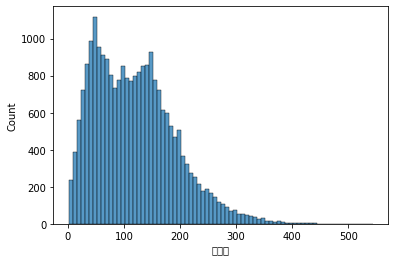

In [ ]:
import seaborn as sns
sns.histplot(y_train)   # y의 분포 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

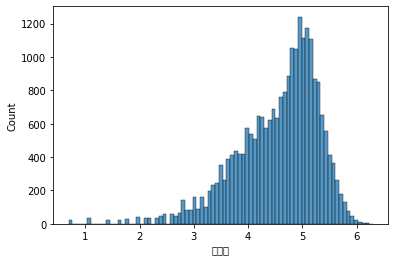

In [ ]:
log_y_train = np.log1p(y_train)
log_y_vali = np.log1p(y_vali)
sns.histplot(log_y_train)   # y의 분포 확인

In [ ]:
X_train['하늘상태'] = X_train['하늘상태'].astype(str)
X_train['강수형태'] = X_train['강수형태'].astype(str)
X_train['winter'] = X_train['winter'].astype(str)

X_vali['하늘상태'] = X_vali['하늘상태'].astype(str)
X_vali['강수형태'] = X_vali['강수형태'].astype(str)
X_vali['winter'] = X_vali['winter'].astype(str)

In [ ]:
data_train = pd.get_dummies(X_train)
data_vali = pd.get_dummies(X_vali)

In [ ]:
data_vali['강수형태_1'] = 0
data_vali['winter_1'] = 0

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(data_train)
scaled_vali = scaler.transform(data_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
scaled_vali.shape

(1054, 13)

In [ ]:
#### SVR
svr_lin_reg = LinearSVR(random_state = 2021)
svm_ploy3_reg = SVR(kernel='poly', degree=3)
svm_rbf3_reg = SVR(kernel='rbf', degree=3)

In [ ]:
def get_rmse(y_test,pred):
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.3f}'.format(rmse))

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    get_rmse(y_test, pred)

In [ ]:
for model in [svr_lin_reg, svm_ploy3_reg, svm_rbf3_reg]:
  get_model_predict(model, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 92.071
### SVR ###
RMSE: 133.193
### SVR ###
RMSE: 114.569


In [ ]:
from sklearn.model_selection import GridSearchCV
svr_lin_reg_0 = LinearSVR(random_state = 2021)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'max_iter': [1000, 10000]}
]

result = GridSearchCV(svr_lin_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=LinearSVR(random_state=2021),
             param_grid=[{'C': [0.01, 0.1, 1], 'max_iter': [1000, 10000]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 0.1, 'max_iter': 1000}

In [ ]:
svr_lin_reg_2 =  LinearSVR(random_state = 2021, C = 0.1, max_iter=1000)

get_model_predict(svr_lin_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 93.118


In [ ]:
svm_ploy3_reg_0 = SVR(kernel='poly', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_ploy3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_ploy3_reg_2 =  SVR(kernel='poly',C = 1, gamma=0.1)

get_model_predict(svm_ploy3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 108.595


In [ ]:
svm_rbf3_reg_0 = SVR(kernel='rbf', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_rbf3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_rbf3_reg_2 =  SVR(kernel='rbf', C = 1, gamma=0.1)

get_model_predict(svm_rbf3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 92.565


In [ ]:
#### test
y_test = final1_test['대여수']
X_test = final1_test.drop('대여수',axis=1, inplace=False)
log_y_test = np.log1p(y_test)

X_test['하늘상태'] = X_test['하늘상태'].astype(str)
X_test['강수형태'] = X_test['강수형태'].astype(str)
X_test['winter'] = X_test['winter'].astype(str)

data_test = pd.get_dummies(X_test)
data_test

,습도,풍속,강수확률,일최고기온,일최저기온,하늘상태_1,하늘상태_2,하늘상태_3,강수형태_0,강수형태_1,winter_0
0,72.668919,1.845270,23.932432,26.263158,18.125,0,0,1,1,0,1
1,77.567568,1.429730,25.972973,23.631579,16.750,0,0,1,1,0,1
2,73.716216,1.247973,5.743243,24.947368,16.000,0,1,0,1,0,1
3,71.317568,1.499324,5.810811,27.368421,17.375,0,1,0,1,0,1
4,71.925676,1.758108,15.810811,28.526316,18.125,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1015,74.324324,1.865541,11.418919,30.052632,21.500,0,1,0,1,0,1
1016,71.756757,1.710811,17.229730,29.789474,21.625,0,0,1,1,0,1
1017,71.993243,1.403378,14.256757,29.684211,21.875,0,1,0,1,0,1
1018,70.709459,1.623649,18.918919,30.842105,21.750,0,1,0,1,0,1


In [ ]:
data_test['winter_1'] = 0
data_test['하늘상태_4'] = 0

In [ ]:
scaled_test = scaler.transform(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
pred_test1 = svr_lin_reg_2.predict(scaled_test)
pred_test2 = svm_ploy3_reg_2.predict(scaled_test)
pred_test3 = svm_rbf3_reg_2.predict(scaled_test)

print(np.sqrt(mean_squared_error(np.expm1(pred_test1), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test2), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test3), np.expm1(log_y_test))))

378.41896134449047
169.62826380863802
118.35661976049632


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.expm1(pred_test1), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test2), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test3), np.expm1(log_y_test)))

353.10271670451976
111.64660326064299
99.28682393238134


### clus1

In [4]:
#read the file
train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_raw_1.csv').drop(columns=['대여 대여소번호'])
vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_raw_1.csv').drop(columns=['대여 대여소번호'])
test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_raw_1.csv').drop(columns=['대여 대여소번호'])

In [5]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [6]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [7]:
weather_train.shape

(580, 9)

In [8]:
weather_vali.shape

(151, 9)

In [9]:
weather_test.shape

(30, 9)

In [10]:
weather_train['일자'] = weather_train['일자'].astype(str)
weather_vali['일자'] = weather_vali['일자'].astype(str)
weather_test['일자'] = weather_test['일자'].astype(str)

In [11]:
final1_train = pd.merge(train, weather_train, how='left', on='일자').drop(columns='Unnamed: 0')

In [12]:
final1_val = vali.drop(columns=['Unnamed: 0', 'clus'])
final1_test = test.drop(columns=['Unnamed: 0', 'clus'])
final1_test

,일자,대여수,습도,풍속,하늘상태,강수형태,강수확률,일최고기온,일최저기온,winter
0,2021-06-01,79,72.668919,1.845270,3,0,23.932432,26.263158,18.125,0
1,2021-06-02,113,77.567568,1.429730,3,0,25.972973,23.631579,16.750,0
2,2021-06-03,28,73.716216,1.247973,2,0,5.743243,24.947368,16.000,0
3,2021-06-04,92,71.317568,1.499324,2,0,5.810811,27.368421,17.375,0
4,2021-06-05,105,71.925676,1.758108,3,0,15.810811,28.526316,18.125,0
...,...,...,...,...,...,...,...,...,...,...
2935,2021-06-26,77,74.324324,1.865541,2,0,11.418919,30.052632,21.500,0
2936,2021-06-27,74,71.756757,1.710811,3,0,17.229730,29.789474,21.625,0
2937,2021-06-28,95,71.993243,1.403378,2,0,14.256757,29.684211,21.875,0
2938,2021-06-29,82,70.709459,1.623649,2,0,18.918919,30.842105,21.750,0


In [13]:
final1_train = pd.concat([final1_train, final1_val[final1_val['일자']<'2021-05-01']])
final1_val = final1_val[final1_val['일자']>='2021-05-01']

In [14]:
print(final1_train.shape)
print(final1_val.shape)
print(final1_test.shape)

(68502, 10)
(3038, 10)
(2940, 10)


In [15]:
final1_train = final1_train.drop(columns = ['일자'])
final1_val = final1_val.drop(columns = ['일자'])
final1_test = final1_test.drop(columns = ['일자'])

In [16]:
y_train = final1_train['대여수']
X_train = final1_train.drop('대여수',axis=1, inplace=False)

y_vali = final1_val['대여수']
X_vali = final1_val.drop('대여수',axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

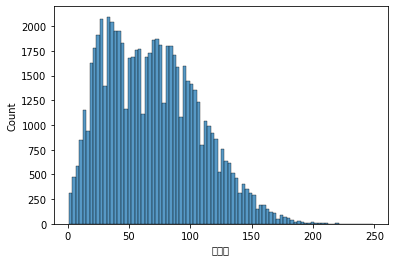

In [17]:
import seaborn as sns
sns.histplot(y_train)   # y의 분포 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

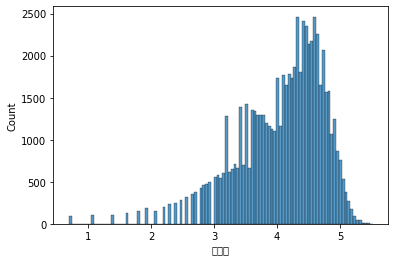

In [18]:
log_y_train = np.log1p(y_train)
log_y_vali = np.log1p(y_vali)
sns.histplot(log_y_train)   # y의 분포 확인

In [19]:
X_train['하늘상태'] = X_train['하늘상태'].astype(str)
X_train['강수형태'] = X_train['강수형태'].astype(str)
X_train['winter'] = X_train['winter'].astype(str)

X_vali['하늘상태'] = X_vali['하늘상태'].astype(str)
X_vali['강수형태'] = X_vali['강수형태'].astype(str)
X_vali['winter'] = X_vali['winter'].astype(str)

In [20]:
data_train = pd.get_dummies(X_train)
data_vali = pd.get_dummies(X_vali)

In [21]:
data_vali['강수형태_1'] = 0
data_vali['winter_1'] = 0

In [22]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(data_train)
scaled_vali = scaler.transform(data_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [23]:
scaled_vali.shape

(3038, 13)

In [ ]:
#### SVR
svr_lin_reg = LinearSVR(random_state = 2021)
svm_ploy3_reg = SVR(kernel='poly', degree=3)
svm_rbf3_reg = SVR(kernel='rbf', degree=3)

In [24]:
def get_rmse(y_test,pred):
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.3f}'.format(rmse))

In [25]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    get_rmse(y_test, pred)

In [ ]:
for model in [svr_lin_reg, svm_ploy3_reg, svm_rbf3_reg]:
  get_model_predict(model, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 45.709
### SVR ###
RMSE: 75.167
### SVR ###
RMSE: 66.962


In [ ]:
from sklearn.model_selection import GridSearchCV
svr_lin_reg_0 = LinearSVR(random_state = 2021)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'max_iter': [1000, 10000]}
]

result = GridSearchCV(svr_lin_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

In [ ]:
result.best_params_

{'C': 1, 'max_iter': 1000}

In [26]:
svr_lin_reg_2 =  LinearSVR(random_state = 2021, C = 1, max_iter=1000)

get_model_predict(svr_lin_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 45.709


In [ ]:
svm_ploy3_reg_0 = SVR(kernel='poly', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_ploy3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [27]:
svm_ploy3_reg_2 =  SVR(kernel='poly',C = 1, gamma=0.1)

get_model_predict(svm_ploy3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 57.269


In [ ]:
svm_rbf3_reg_0 = SVR(kernel='rbf', degree=3)

param_grid = [
    {'C': [0.1, 1], 
     'gamma': [0.1, 0.01]}
]

result = GridSearchCV(svm_rbf3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'gamma': [0.1, 0.01]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [28]:
svm_rbf3_reg_2 =  SVR(kernel='rbf', C = 1, gamma=0.1)

get_model_predict(svm_rbf3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 47.441


In [29]:
#### test
y_test = final1_test['대여수']
X_test = final1_test.drop('대여수',axis=1, inplace=False)
log_y_test = np.log1p(y_test)

X_test['하늘상태'] = X_test['하늘상태'].astype(str)
X_test['강수형태'] = X_test['강수형태'].astype(str)
X_test['winter'] = X_test['winter'].astype(str)

data_test = pd.get_dummies(X_test)
data_test

,습도,풍속,강수확률,일최고기온,일최저기온,하늘상태_1,하늘상태_2,하늘상태_3,강수형태_0,강수형태_1,winter_0
0,72.668919,1.845270,23.932432,26.263158,18.125,0,0,1,1,0,1
1,77.567568,1.429730,25.972973,23.631579,16.750,0,0,1,1,0,1
2,73.716216,1.247973,5.743243,24.947368,16.000,0,1,0,1,0,1
3,71.317568,1.499324,5.810811,27.368421,17.375,0,1,0,1,0,1
4,71.925676,1.758108,15.810811,28.526316,18.125,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2935,74.324324,1.865541,11.418919,30.052632,21.500,0,1,0,1,0,1
2936,71.756757,1.710811,17.229730,29.789474,21.625,0,0,1,1,0,1
2937,71.993243,1.403378,14.256757,29.684211,21.875,0,1,0,1,0,1
2938,70.709459,1.623649,18.918919,30.842105,21.750,0,1,0,1,0,1


In [30]:
data_test['winter_1'] = 0
data_test['하늘상태_4'] = 0

In [31]:
scaled_test = scaler.transform(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [32]:
from sklearn.metrics import mean_squared_error
pred_test1 = svr_lin_reg_2.predict(scaled_test)
pred_test2 = svm_ploy3_reg_2.predict(scaled_test)
pred_test3 = svm_rbf3_reg_2.predict(scaled_test)

print(np.sqrt(mean_squared_error(np.expm1(pred_test1), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test2), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test3), np.expm1(log_y_test))))

203.02365251208863
683.1533788927117
56.67270697507372


In [33]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.expm1(pred_test1), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test2), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test3), np.expm1(log_y_test)))

191.23662011201833
424.8656094984375
47.01357517114044


### clus 4

In [ ]:
#read the file
train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_raw_4.csv').drop(columns=['대여 대여소번호'])
vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_raw_4.csv').drop(columns=['대여 대여소번호'])
test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_raw_4.csv').drop(columns=['대여 대여소번호'])

In [ ]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [ ]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [ ]:
weather_train.shape

(580, 9)

In [ ]:
weather_vali.shape

(151, 9)

In [ ]:
weather_test.shape

(30, 9)

In [ ]:
weather_train['일자'] = weather_train['일자'].astype(str)
weather_vali['일자'] = weather_vali['일자'].astype(str)
weather_test['일자'] = weather_test['일자'].astype(str)

In [ ]:
final1_train = pd.merge(train, weather_train, how='left', on='일자').drop(columns='Unnamed: 0')

In [ ]:
final1_val = vali.drop(columns=['Unnamed: 0', 'clus'])
final1_test = test.drop(columns=['Unnamed: 0', 'clus'])
final1_test

,일자,대여수,습도,풍속,하늘상태,강수형태,강수확률,일최고기온,일최저기온,winter
0,2021-06-01,64,72.668919,1.845270,3,0,23.932432,26.263158,18.125,0
1,2021-06-02,88,77.567568,1.429730,3,0,25.972973,23.631579,16.750,0
2,2021-06-03,19,73.716216,1.247973,2,0,5.743243,24.947368,16.000,0
3,2021-06-04,82,71.317568,1.499324,2,0,5.810811,27.368421,17.375,0
4,2021-06-05,73,71.925676,1.758108,3,0,15.810811,28.526316,18.125,0
...,...,...,...,...,...,...,...,...,...,...
3055,2021-06-26,62,74.324324,1.865541,2,0,11.418919,30.052632,21.500,0
3056,2021-06-27,63,71.756757,1.710811,3,0,17.229730,29.789474,21.625,0
3057,2021-06-28,95,71.993243,1.403378,2,0,14.256757,29.684211,21.875,0
3058,2021-06-29,77,70.709459,1.623649,2,0,18.918919,30.842105,21.750,0


In [ ]:
final1_train = pd.concat([final1_train, final1_val[final1_val['일자']<'2021-05-01']])
final1_val = final1_val[final1_val['일자']>='2021-05-01']

In [ ]:
print(final1_train.shape)
print(final1_val.shape)
print(final1_test.shape)

(71298, 10)
(3162, 10)
(3060, 10)


In [ ]:
final1_train = final1_train.drop(columns = ['일자'])
final1_val = final1_val.drop(columns = ['일자'])
final1_test = final1_test.drop(columns = ['일자'])

In [ ]:
y_train = final1_train['대여수']
X_train = final1_train.drop('대여수',axis=1, inplace=False)

y_vali = final1_val['대여수']
X_vali = final1_val.drop('대여수',axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

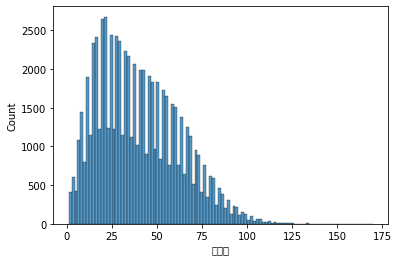

In [ ]:
import seaborn as sns
sns.histplot(y_train)   # y의 분포 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

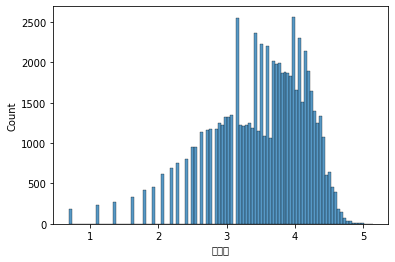

In [ ]:
log_y_train = np.log1p(y_train)
log_y_vali = np.log1p(y_vali)
sns.histplot(log_y_train)   # y의 분포 확인

In [ ]:
X_train['하늘상태'] = X_train['하늘상태'].astype(str)
X_train['강수형태'] = X_train['강수형태'].astype(str)
X_train['winter'] = X_train['winter'].astype(str)

X_vali['하늘상태'] = X_vali['하늘상태'].astype(str)
X_vali['강수형태'] = X_vali['강수형태'].astype(str)
X_vali['winter'] = X_vali['winter'].astype(str)

In [ ]:
data_train = pd.get_dummies(X_train)
data_vali = pd.get_dummies(X_vali)

In [ ]:
data_vali['강수형태_1'] = 0
data_vali['winter_1'] = 0

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(data_train)
scaled_vali = scaler.transform(data_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
scaled_vali.shape

(3162, 13)

In [ ]:
#### SVR
svr_lin_reg = LinearSVR(random_state = 2021)
svm_ploy3_reg = SVR(kernel='poly', degree=3)
svm_rbf3_reg = SVR(kernel='rbf', degree=3)

In [ ]:
def get_rmse(y_test,pred):
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.3f}'.format(rmse))

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    get_rmse(y_test, pred)

In [ ]:
for model in [svr_lin_reg, svm_ploy3_reg, svm_rbf3_reg]:
  get_model_predict(model, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 28.105
### SVR ###
RMSE: 45.363
### SVR ###
RMSE: 40.122


In [ ]:
from sklearn.model_selection import GridSearchCV
svr_lin_reg_0 = LinearSVR(random_state = 2021)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'max_iter': [1000, 10000]}
]

result = GridSearchCV(svr_lin_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

In [ ]:
result.best_params_

{'C': 1, 'max_iter': 1000}

In [ ]:
svr_lin_reg_2 =  LinearSVR(random_state = 2021, C = 1, max_iter=1000)

get_model_predict(svr_lin_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 28.105


In [ ]:
svm_ploy3_reg_0 = SVR(kernel='poly', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_ploy3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_ploy3_reg_2 =  SVR(kernel='poly',C = 1, gamma=0.1)

get_model_predict(svm_ploy3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 34.656


In [ ]:
svm_rbf3_reg_0 = SVR(kernel='rbf', degree=3)

param_grid = [
    {'C': [0.1, 1], 
     'gamma': [0.1, 0.01]}
]

result = GridSearchCV(svm_rbf3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'gamma': [0.1, 0.01]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_rbf3_reg_2 =  SVR(kernel='rbf', C = 1, gamma=0.1)

get_model_predict(svm_rbf3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 29.161


In [ ]:
#### test
y_test = final1_test['대여수']
X_test = final1_test.drop('대여수',axis=1, inplace=False)
log_y_test = np.log1p(y_test)

X_test['하늘상태'] = X_test['하늘상태'].astype(str)
X_test['강수형태'] = X_test['강수형태'].astype(str)
X_test['winter'] = X_test['winter'].astype(str)

data_test = pd.get_dummies(X_test)
data_test

,습도,풍속,강수확률,일최고기온,일최저기온,하늘상태_1,하늘상태_2,하늘상태_3,강수형태_0,강수형태_1,winter_0
0,72.668919,1.845270,23.932432,26.263158,18.125,0,0,1,1,0,1
1,77.567568,1.429730,25.972973,23.631579,16.750,0,0,1,1,0,1
2,73.716216,1.247973,5.743243,24.947368,16.000,0,1,0,1,0,1
3,71.317568,1.499324,5.810811,27.368421,17.375,0,1,0,1,0,1
4,71.925676,1.758108,15.810811,28.526316,18.125,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3055,74.324324,1.865541,11.418919,30.052632,21.500,0,1,0,1,0,1
3056,71.756757,1.710811,17.229730,29.789474,21.625,0,0,1,1,0,1
3057,71.993243,1.403378,14.256757,29.684211,21.875,0,1,0,1,0,1
3058,70.709459,1.623649,18.918919,30.842105,21.750,0,1,0,1,0,1


In [ ]:
data_test['winter_1'] = 0
data_test['하늘상태_4'] = 0

In [ ]:
data_test = data_test[['습도', '풍속', '강수확률', '일최고기온', '일최저기온', '하늘상태_1', '하늘상태_2', '하늘상태_3', '하늘상태_4', 
           '강수형태_0', '강수형태_1', 'winter_0', 'winter_1']]

In [ ]:
scaled_test = scaler.transform(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
pred_test1 = svr_lin_reg_2.predict(scaled_test)
pred_test2 = svm_ploy3_reg_2.predict(scaled_test)
pred_test3 = svm_rbf3_reg_2.predict(scaled_test)

print(np.sqrt(mean_squared_error(np.expm1(pred_test1), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test2), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test3), np.expm1(log_y_test))))

309.2194583526805
4492.0661325915735
86.03784025994682


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.expm1(pred_test1), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test2), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test3), np.expm1(log_y_test)))

303.8427353198745
3168.2371467921507
68.3000589435218


### clus152

In [ ]:
#read the file
train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_152.csv')
vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_152.csv')
test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_152.csv')

In [ ]:
train

,일자,대여수,일최고기온,일최저기온,습도,강수확률,풍속
0,2019-06-01,350,29.052632,29.052632,46.959459,5.067568,1.439189
1,2019-06-02,370,30.315789,30.315789,50.270270,5.337838,1.657432
2,2019-06-03,188,29.947368,29.947368,59.932432,12.770270,1.747297
3,2019-06-04,215,28.631579,28.631579,64.695946,20.675676,1.635811
4,2019-06-05,189,26.684211,26.684211,64.324324,38.783784,3.034459
...,...,...,...,...,...,...,...
574,2020-12-27,155,4.789474,0.875000,70.709459,20.608108,2.230405
575,2020-12-28,127,-1.789474,-6.500000,53.783784,14.797297,3.520946
576,2020-12-29,56,-4.421053,-11.000000,46.317568,7.905405,3.205405
577,2020-12-30,25,-1.894737,-8.750000,48.445946,10.472973,2.462838


In [ ]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [ ]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [ ]:
weather_train.shape

(580, 9)

In [ ]:
weather_vali.shape

(151, 9)

In [ ]:
weather_test.shape

(30, 9)

In [ ]:
weather_train['일자'] = weather_train['일자'].astype(str)
weather_vali['일자'] = weather_vali['일자'].astype(str)
weather_test['일자'] = weather_test['일자'].astype(str)

In [ ]:
final1_train = pd.merge(train.iloc[:,:2], weather_train, how='left', on='일자')

In [ ]:
final1_train

,일자,대여수,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,2019-06-01,350,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,2019-06-02,370,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,2019-06-03,188,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,2019-06-04,215,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,2019-06-05,189,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...,...,...
574,2020-12-27,155,4.789474,0.875000,3,70.709459,20.608108,2.230405,0,1
575,2020-12-28,127,-1.789474,-6.500000,2,53.783784,14.797297,3.520946,0,1
576,2020-12-29,56,-4.421053,-11.000000,2,46.317568,7.905405,3.205405,0,1
577,2020-12-30,25,-1.894737,-8.750000,2,48.445946,10.472973,2.462838,0,1


In [ ]:
final1_val = vali
final1_test = test
final1_test

,일자,대여수,습도,풍속,하늘상태,강수형태,강수확률,일최고기온,일최저기온,winter
0,2021-06-01,279,72.668919,1.845270,3,0,23.932432,26.263158,18.125,0
1,2021-06-02,328,77.567568,1.429730,3,0,25.972973,23.631579,16.750,0
2,2021-06-03,61,73.716216,1.247973,2,0,5.743243,24.947368,16.000,0
3,2021-06-04,358,71.317568,1.499324,2,0,5.810811,27.368421,17.375,0
4,2021-06-05,611,71.925676,1.758108,3,0,15.810811,28.526316,18.125,0
5,2021-06-06,597,71.216216,2.238514,3,0,20.472973,28.631579,18.750,0
6,2021-06-07,281,71.216216,2.251351,3,0,20.067568,30.210526,20.000,0
7,2021-06-08,310,78.716216,1.736486,3,0,28.581081,30.052632,21.125,0
8,2021-06-09,287,77.736486,1.877703,2,0,14.054054,28.210526,20.625,0
9,2021-06-10,135,73.716216,2.058108,1,0,2.364865,28.684211,19.625,0


In [ ]:
final1_train = pd.concat([final1_train, final1_val[final1_val['일자']<'2021-05-01']])
final1_val = final1_val[final1_val['일자']>='2021-05-01']

In [ ]:
print(final1_train.shape)
print(final1_val.shape)
print(final1_test.shape)

(699, 10)
(31, 10)
(30, 10)


In [ ]:
final1_train = final1_train.drop(columns = ['일자'])
final1_val = final1_val.drop(columns = ['일자'])
final1_test = final1_test.drop(columns = ['일자'])

In [ ]:
y_train = final1_train['대여수']
X_train = final1_train.drop('대여수',axis=1, inplace=False)

y_vali = final1_val['대여수']
X_vali = final1_val.drop('대여수',axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

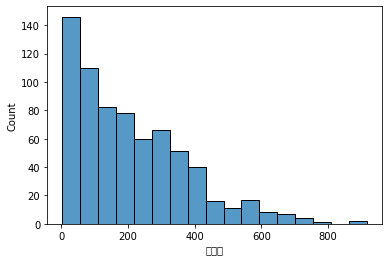

In [ ]:
import seaborn as sns
sns.histplot(y_train)   # y의 분포 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

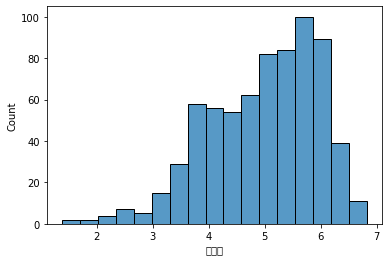

In [ ]:
log_y_train = np.log1p(y_train)
log_y_vali = np.log1p(y_vali)
sns.histplot(log_y_train)   # y의 분포 확인

In [ ]:
X_train['하늘상태'] = X_train['하늘상태'].astype(str)
X_train['강수형태'] = X_train['강수형태'].astype(str)
X_train['winter'] = X_train['winter'].astype(str)

X_vali['하늘상태'] = X_vali['하늘상태'].astype(str)
X_vali['강수형태'] = X_vali['강수형태'].astype(str)
X_vali['winter'] = X_vali['winter'].astype(str)

In [ ]:
X_train

,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,3,60.439189,22.972973,2.021622,0,0
116,20.526316,12.250000,3,59.459459,19.864865,1.972297,0,0
117,19.210526,11.875000,3,60.675676,27.756757,2.258784,0,0
118,17.052632,10.125000,4,71.148649,35.567568,2.427703,0,0


In [ ]:
data_train = pd.get_dummies(X_train)
data_vali = pd.get_dummies(X_vali)

In [ ]:
data_train

,일최고기온,일최저기온,습도,강수확률,풍속,하늘상태_1,하늘상태_2,하늘상태_3,하늘상태_4,강수형태_0,강수형태_1,winter_0,winter_1
0,29.052632,29.052632,46.959459,5.067568,1.439189,0,1,0,0,1,0,1,0
1,30.315789,30.315789,50.270270,5.337838,1.657432,0,1,0,0,1,0,1,0
2,29.947368,29.947368,59.932432,12.770270,1.747297,0,1,0,0,1,0,1,0
3,28.631579,28.631579,64.695946,20.675676,1.635811,0,0,1,0,1,0,1,0
4,26.684211,26.684211,64.324324,38.783784,3.034459,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,60.439189,22.972973,2.021622,0,0,1,0,1,0,1,0
116,20.526316,12.250000,59.459459,19.864865,1.972297,0,0,1,0,1,0,1,0
117,19.210526,11.875000,60.675676,27.756757,2.258784,0,0,1,0,1,0,1,0
118,17.052632,10.125000,71.148649,35.567568,2.427703,0,0,0,1,1,0,1,0


In [ ]:
data_vali['강수형태_1'] = 0
data_vali['winter_1'] = 0

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(data_train)
scaled_vali = scaler.transform(data_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
scaled_train.shape

(699, 13)

In [ ]:
#### SVR
svr_lin_reg = LinearSVR(random_state = 2021)
svm_ploy3_reg = SVR(kernel='poly', degree=3)
svm_rbf3_reg = SVR(kernel='rbf', degree=3)

In [ ]:
def get_rmse(y_test,pred):
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.3f}'.format(rmse))

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    get_rmse(y_test, pred)

In [ ]:
for model in [svr_lin_reg, svm_ploy3_reg, svm_rbf3_reg]:
  get_model_predict(model, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 277.621
### SVR ###
RMSE: 317.181
### SVR ###
RMSE: 296.247


In [ ]:
from sklearn.model_selection import GridSearchCV
svr_lin_reg_0 = LinearSVR(random_state = 2021)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'max_iter': [1000, 10000]}
]

result = GridSearchCV(svr_lin_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

In [ ]:
result.best_params_

{'C': 1, 'max_iter': 1000}

In [ ]:
svr_lin_reg_2 =  LinearSVR(random_state = 2021, C = 1, max_iter=1000)

get_model_predict(svr_lin_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 277.621


In [ ]:
svm_ploy3_reg_0 = SVR(kernel='poly', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_ploy3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_ploy3_reg_2 =  SVR(kernel='poly',C = 1, gamma=0.1)

get_model_predict(svm_ploy3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 316.172


In [ ]:
svm_rbf3_reg_0 = SVR(kernel='rbf', degree=3)

param_grid = [
    {'C': [0.1, 1], 
     'gamma': [0.1, 0.01]}
]

result = GridSearchCV(svm_rbf3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'gamma': [0.1, 0.01]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_rbf3_reg_2 =  SVR(kernel='rbf', C = 1, gamma=0.1)

get_model_predict(svm_rbf3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 290.673


In [ ]:
#### test
y_test = final1_test['대여수']
X_test = final1_test.drop('대여수',axis=1, inplace=False)
log_y_test = np.log1p(y_test)

X_test['하늘상태'] = X_test['하늘상태'].astype(str)
X_test['강수형태'] = X_test['강수형태'].astype(str)
X_test['winter'] = X_test['winter'].astype(str)

data_test = pd.get_dummies(X_test)
data_test

,습도,풍속,강수확률,일최고기온,일최저기온,하늘상태_1,하늘상태_2,하늘상태_3,강수형태_0,강수형태_1,winter_0
0,72.668919,1.845270,23.932432,26.263158,18.125,0,0,1,1,0,1
1,77.567568,1.429730,25.972973,23.631579,16.750,0,0,1,1,0,1
2,73.716216,1.247973,5.743243,24.947368,16.000,0,1,0,1,0,1
3,71.317568,1.499324,5.810811,27.368421,17.375,0,1,0,1,0,1
4,71.925676,1.758108,15.810811,28.526316,18.125,0,0,1,1,0,1
5,71.216216,2.238514,20.472973,28.631579,18.750,0,0,1,1,0,1
6,71.216216,2.251351,20.067568,30.210526,20.000,0,0,1,1,0,1
7,78.716216,1.736486,28.581081,30.052632,21.125,0,0,1,1,0,1
8,77.736486,1.877703,14.054054,28.210526,20.625,0,1,0,1,0,1
9,73.716216,2.058108,2.364865,28.684211,19.625,1,0,0,1,0,1


In [ ]:
data_test['winter_1'] = 0
data_test['하늘상태_4'] = 0

In [ ]:
data_test = data_test[['습도', '풍속', '강수확률', '일최고기온', '일최저기온', '하늘상태_1', '하늘상태_2', '하늘상태_3', '하늘상태_4', 
           '강수형태_0', '강수형태_1', 'winter_0', 'winter_1']]

In [ ]:
scaled_test = scaler.transform(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
pred_test1 = svr_lin_reg_2.predict(scaled_test)
pred_test2 = svm_ploy3_reg_2.predict(scaled_test)
pred_test3 = svm_rbf3_reg_2.predict(scaled_test)

print(np.sqrt(mean_squared_error(np.expm1(pred_test1), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test2), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test3), np.expm1(log_y_test))))

21784.32682772024
231.66906082855778
173.43392889157306


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.expm1(pred_test1), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test2), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test3), np.expm1(log_y_test)))

21329.513633133767
191.85219119023208
135.31321229847518


### clus 207

In [ ]:
#read the file
train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_207.csv')
vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_207.csv')
test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_207.csv')

In [ ]:
train

,일자,대여수,일최고기온,일최저기온,습도,강수확률,풍속
0,2019-06-01,573,29.052632,29.052632,46.959459,5.067568,1.439189
1,2019-06-02,587,30.315789,30.315789,50.270270,5.337838,1.657432
2,2019-06-03,347,29.947368,29.947368,59.932432,12.770270,1.747297
3,2019-06-04,278,28.631579,28.631579,64.695946,20.675676,1.635811
4,2019-06-05,352,26.684211,26.684211,64.324324,38.783784,3.034459
...,...,...,...,...,...,...,...
574,2020-12-27,147,4.789474,0.875000,70.709459,20.608108,2.230405
575,2020-12-28,154,-1.789474,-6.500000,53.783784,14.797297,3.520946
576,2020-12-29,80,-4.421053,-11.000000,46.317568,7.905405,3.205405
577,2020-12-30,31,-1.894737,-8.750000,48.445946,10.472973,2.462838


In [ ]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [ ]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [ ]:
weather_train.shape

(580, 9)

In [ ]:
weather_vali.shape

(151, 9)

In [ ]:
weather_test.shape

(30, 9)

In [ ]:
weather_train['일자'] = weather_train['일자'].astype(str)
weather_vali['일자'] = weather_vali['일자'].astype(str)
weather_test['일자'] = weather_test['일자'].astype(str)

In [ ]:
final1_train = pd.merge(train.iloc[:,:2], weather_train, how='left', on='일자')

In [ ]:
final1_train

,일자,대여수,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,2019-06-01,573,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,2019-06-02,587,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,2019-06-03,347,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,2019-06-04,278,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,2019-06-05,352,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...,...,...
574,2020-12-27,147,4.789474,0.875000,3,70.709459,20.608108,2.230405,0,1
575,2020-12-28,154,-1.789474,-6.500000,2,53.783784,14.797297,3.520946,0,1
576,2020-12-29,80,-4.421053,-11.000000,2,46.317568,7.905405,3.205405,0,1
577,2020-12-30,31,-1.894737,-8.750000,2,48.445946,10.472973,2.462838,0,1


In [ ]:
final1_val = vali
final1_test = test
final1_test

,일자,대여수,습도,풍속,하늘상태,강수형태,강수확률,일최고기온,일최저기온,winter
0,2021-06-01,297,72.668919,1.845270,3,0,23.932432,26.263158,18.125,0
1,2021-06-02,451,77.567568,1.429730,3,0,25.972973,23.631579,16.750,0
2,2021-06-03,92,73.716216,1.247973,2,0,5.743243,24.947368,16.000,0
3,2021-06-04,498,71.317568,1.499324,2,0,5.810811,27.368421,17.375,0
4,2021-06-05,927,71.925676,1.758108,3,0,15.810811,28.526316,18.125,0
5,2021-06-06,747,71.216216,2.238514,3,0,20.472973,28.631579,18.750,0
6,2021-06-07,380,71.216216,2.251351,3,0,20.067568,30.210526,20.000,0
7,2021-06-08,377,78.716216,1.736486,3,0,28.581081,30.052632,21.125,0
8,2021-06-09,328,77.736486,1.877703,2,0,14.054054,28.210526,20.625,0
9,2021-06-10,169,73.716216,2.058108,1,0,2.364865,28.684211,19.625,0


In [ ]:
final1_train = pd.concat([final1_train, final1_val[final1_val['일자']<'2021-05-01']])
final1_val = final1_val[final1_val['일자']>='2021-05-01']

In [ ]:
print(final1_train.shape)
print(final1_val.shape)
print(final1_test.shape)

(699, 10)
(31, 10)
(30, 10)


In [ ]:
final1_train = final1_train.drop(columns = ['일자'])
final1_val = final1_val.drop(columns = ['일자'])
final1_test = final1_test.drop(columns = ['일자'])

In [ ]:
y_train = final1_train['대여수']
X_train = final1_train.drop('대여수',axis=1, inplace=False)

y_vali = final1_val['대여수']
X_vali = final1_val.drop('대여수',axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

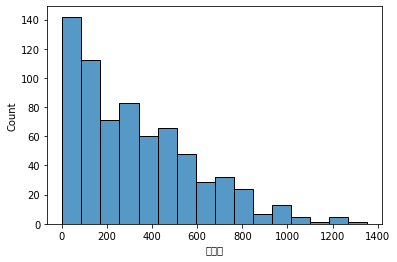

In [ ]:
import seaborn as sns
sns.histplot(y_train)   # y의 분포 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

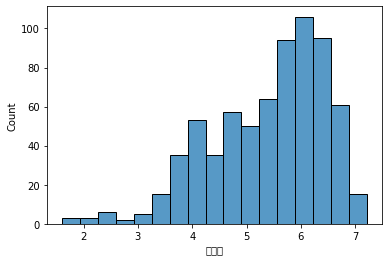

In [ ]:
log_y_train = np.log1p(y_train)
log_y_vali = np.log1p(y_vali)
sns.histplot(log_y_train)   # y의 분포 확인

In [ ]:
X_train['하늘상태'] = X_train['하늘상태'].astype(str)
X_train['강수형태'] = X_train['강수형태'].astype(str)
X_train['winter'] = X_train['winter'].astype(str)

X_vali['하늘상태'] = X_vali['하늘상태'].astype(str)
X_vali['강수형태'] = X_vali['강수형태'].astype(str)
X_vali['winter'] = X_vali['winter'].astype(str)

In [ ]:
X_train

,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,3,60.439189,22.972973,2.021622,0,0
116,20.526316,12.250000,3,59.459459,19.864865,1.972297,0,0
117,19.210526,11.875000,3,60.675676,27.756757,2.258784,0,0
118,17.052632,10.125000,4,71.148649,35.567568,2.427703,0,0


In [ ]:
data_train = pd.get_dummies(X_train)
data_vali = pd.get_dummies(X_vali)

In [ ]:
data_train

,일최고기온,일최저기온,습도,강수확률,풍속,하늘상태_1,하늘상태_2,하늘상태_3,하늘상태_4,강수형태_0,강수형태_1,winter_0,winter_1
0,29.052632,29.052632,46.959459,5.067568,1.439189,0,1,0,0,1,0,1,0
1,30.315789,30.315789,50.270270,5.337838,1.657432,0,1,0,0,1,0,1,0
2,29.947368,29.947368,59.932432,12.770270,1.747297,0,1,0,0,1,0,1,0
3,28.631579,28.631579,64.695946,20.675676,1.635811,0,0,1,0,1,0,1,0
4,26.684211,26.684211,64.324324,38.783784,3.034459,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,60.439189,22.972973,2.021622,0,0,1,0,1,0,1,0
116,20.526316,12.250000,59.459459,19.864865,1.972297,0,0,1,0,1,0,1,0
117,19.210526,11.875000,60.675676,27.756757,2.258784,0,0,1,0,1,0,1,0
118,17.052632,10.125000,71.148649,35.567568,2.427703,0,0,0,1,1,0,1,0


In [ ]:
data_vali['강수형태_1'] = 0
data_vali['winter_1'] = 0

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(data_train)
scaled_vali = scaler.transform(data_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
scaled_train.shape

(699, 13)

In [ ]:
#### SVR
svr_lin_reg = LinearSVR(random_state = 2021)
svm_ploy3_reg = SVR(kernel='poly', degree=3)
svm_rbf3_reg = SVR(kernel='rbf', degree=3)

In [ ]:
def get_rmse(y_test,pred):
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.3f}'.format(rmse))

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    get_rmse(y_test, pred)

In [ ]:
for model in [svr_lin_reg, svm_ploy3_reg, svm_rbf3_reg]:
  get_model_predict(model, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 432.647
### SVR ###
RMSE: 476.729
### SVR ###
RMSE: 441.129


In [ ]:
from sklearn.model_selection import GridSearchCV
svr_lin_reg_0 = LinearSVR(random_state = 2021)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'max_iter': [1000, 10000]}
]

result = GridSearchCV(svr_lin_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=LinearSVR(random_state=2021),
             param_grid=[{'C': [0.01, 0.1, 1], 'max_iter': [1000, 10000]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 0.1, 'max_iter': 1000}

In [ ]:
svr_lin_reg_2 =  LinearSVR(random_state = 2021, C = 1, max_iter=1000)

get_model_predict(svr_lin_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 432.647


In [ ]:
svm_ploy3_reg_0 = SVR(kernel='poly', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_ploy3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_ploy3_reg_2 =  SVR(kernel='poly',C = 1, gamma=0.1)

get_model_predict(svm_ploy3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 461.831


In [ ]:
svm_rbf3_reg_0 = SVR(kernel='rbf', degree=3)

param_grid = [
    {'C': [0.1, 1], 
     'gamma': [0.1, 0.01]}
]

result = GridSearchCV(svm_rbf3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'gamma': [0.1, 0.01]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 0.1, 'gamma': 0.1}

In [ ]:
svm_rbf3_reg_2 =  SVR(kernel='rbf', C = 1, gamma=0.1)

get_model_predict(svm_rbf3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 442.895


In [ ]:
#### test
y_test = final1_test['대여수']
X_test = final1_test.drop('대여수',axis=1, inplace=False)
log_y_test = np.log1p(y_test)

X_test['하늘상태'] = X_test['하늘상태'].astype(str)
X_test['강수형태'] = X_test['강수형태'].astype(str)
X_test['winter'] = X_test['winter'].astype(str)

data_test = pd.get_dummies(X_test)
data_test

,습도,풍속,강수확률,일최고기온,일최저기온,하늘상태_1,하늘상태_2,하늘상태_3,강수형태_0,강수형태_1,winter_0
0,72.668919,1.845270,23.932432,26.263158,18.125,0,0,1,1,0,1
1,77.567568,1.429730,25.972973,23.631579,16.750,0,0,1,1,0,1
2,73.716216,1.247973,5.743243,24.947368,16.000,0,1,0,1,0,1
3,71.317568,1.499324,5.810811,27.368421,17.375,0,1,0,1,0,1
4,71.925676,1.758108,15.810811,28.526316,18.125,0,0,1,1,0,1
5,71.216216,2.238514,20.472973,28.631579,18.750,0,0,1,1,0,1
6,71.216216,2.251351,20.067568,30.210526,20.000,0,0,1,1,0,1
7,78.716216,1.736486,28.581081,30.052632,21.125,0,0,1,1,0,1
8,77.736486,1.877703,14.054054,28.210526,20.625,0,1,0,1,0,1
9,73.716216,2.058108,2.364865,28.684211,19.625,1,0,0,1,0,1


In [ ]:
data_test['winter_1'] = 0
data_test['하늘상태_4'] = 0

In [ ]:
data_test = data_test[['습도', '풍속', '강수확률', '일최고기온', '일최저기온', '하늘상태_1', '하늘상태_2', '하늘상태_3', '하늘상태_4', 
           '강수형태_0', '강수형태_1', 'winter_0', 'winter_1']]

In [ ]:
scaled_test = scaler.transform(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
pred_test1 = svr_lin_reg_2.predict(scaled_test)
pred_test2 = svm_ploy3_reg_2.predict(scaled_test)
pred_test3 = svm_rbf3_reg_2.predict(scaled_test)

print(np.sqrt(mean_squared_error(np.expm1(pred_test1), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test2), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test3), np.expm1(log_y_test))))

18982.138809788274
421.75569070552615
244.76123841982758


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.expm1(pred_test1), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test2), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test3), np.expm1(log_y_test)))

18556.362520849387
360.3730790455521
196.10633190543774


### clus 502

In [ ]:
#read the file
train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_502.csv')
vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_502.csv')
test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_502.csv')

In [ ]:
train

,일자,대여수,일최고기온,일최저기온,습도,강수확률,풍속
0,2019-06-01,742,29.052632,29.052632,46.959459,5.067568,1.439189
1,2019-06-02,628,30.315789,30.315789,50.270270,5.337838,1.657432
2,2019-06-03,344,29.947368,29.947368,59.932432,12.770270,1.747297
3,2019-06-04,357,28.631579,28.631579,64.695946,20.675676,1.635811
4,2019-06-05,388,26.684211,26.684211,64.324324,38.783784,3.034459
...,...,...,...,...,...,...,...
574,2020-12-27,137,4.789474,0.875000,70.709459,20.608108,2.230405
575,2020-12-28,138,-1.789474,-6.500000,53.783784,14.797297,3.520946
576,2020-12-29,96,-4.421053,-11.000000,46.317568,7.905405,3.205405
577,2020-12-30,65,-1.894737,-8.750000,48.445946,10.472973,2.462838


In [ ]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [ ]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [ ]:
weather_train.shape

(580, 9)

In [ ]:
weather_vali.shape

(151, 9)

In [ ]:
weather_test.shape

(30, 9)

In [ ]:
weather_train['일자'] = weather_train['일자'].astype(str)
weather_vali['일자'] = weather_vali['일자'].astype(str)
weather_test['일자'] = weather_test['일자'].astype(str)

In [ ]:
final1_train = pd.merge(train.iloc[:,:2], weather_train, how='left', on='일자')

In [ ]:
final1_train

,일자,대여수,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,2019-06-01,742,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,2019-06-02,628,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,2019-06-03,344,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,2019-06-04,357,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,2019-06-05,388,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...,...,...
574,2020-12-27,137,4.789474,0.875000,3,70.709459,20.608108,2.230405,0,1
575,2020-12-28,138,-1.789474,-6.500000,2,53.783784,14.797297,3.520946,0,1
576,2020-12-29,96,-4.421053,-11.000000,2,46.317568,7.905405,3.205405,0,1
577,2020-12-30,65,-1.894737,-8.750000,2,48.445946,10.472973,2.462838,0,1


In [ ]:
final1_val = vali
final1_test = test
final1_test

,일자,대여수,습도,풍속,하늘상태,강수형태,강수확률,일최고기온,일최저기온,winter
0,2021-06-01,390,72.668919,1.845270,3,0,23.932432,26.263158,18.125,0
1,2021-06-02,471,77.567568,1.429730,3,0,25.972973,23.631579,16.750,0
2,2021-06-03,106,73.716216,1.247973,2,0,5.743243,24.947368,16.000,0
3,2021-06-04,472,71.317568,1.499324,2,0,5.810811,27.368421,17.375,0
4,2021-06-05,929,71.925676,1.758108,3,0,15.810811,28.526316,18.125,0
5,2021-06-06,838,71.216216,2.238514,3,0,20.472973,28.631579,18.750,0
6,2021-06-07,373,71.216216,2.251351,3,0,20.067568,30.210526,20.000,0
7,2021-06-08,433,78.716216,1.736486,3,0,28.581081,30.052632,21.125,0
8,2021-06-09,397,77.736486,1.877703,2,0,14.054054,28.210526,20.625,0
9,2021-06-10,181,73.716216,2.058108,1,0,2.364865,28.684211,19.625,0


In [ ]:
final1_train = pd.concat([final1_train, final1_val[final1_val['일자']<'2021-05-01']])
final1_val = final1_val[final1_val['일자']>='2021-05-01']

In [ ]:
print(final1_train.shape)
print(final1_val.shape)
print(final1_test.shape)

(699, 10)
(31, 10)
(30, 10)


In [ ]:
final1_train = final1_train.drop(columns = ['일자'])
final1_val = final1_val.drop(columns = ['일자'])
final1_test = final1_test.drop(columns = ['일자'])

In [ ]:
y_train = final1_train['대여수']
X_train = final1_train.drop('대여수',axis=1, inplace=False)

y_vali = final1_val['대여수']
X_vali = final1_val.drop('대여수',axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

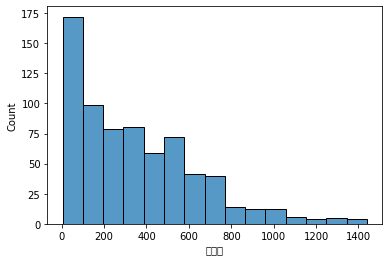

In [ ]:
import seaborn as sns
sns.histplot(y_train)   # y의 분포 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

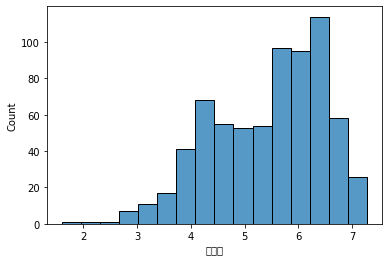

In [ ]:
log_y_train = np.log1p(y_train)
log_y_vali = np.log1p(y_vali)
sns.histplot(log_y_train)   # y의 분포 확인

In [ ]:
X_train['하늘상태'] = X_train['하늘상태'].astype(str)
X_train['강수형태'] = X_train['강수형태'].astype(str)
X_train['winter'] = X_train['winter'].astype(str)

X_vali['하늘상태'] = X_vali['하늘상태'].astype(str)
X_vali['강수형태'] = X_vali['강수형태'].astype(str)
X_vali['winter'] = X_vali['winter'].astype(str)

In [ ]:
X_train

,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,3,60.439189,22.972973,2.021622,0,0
116,20.526316,12.250000,3,59.459459,19.864865,1.972297,0,0
117,19.210526,11.875000,3,60.675676,27.756757,2.258784,0,0
118,17.052632,10.125000,4,71.148649,35.567568,2.427703,0,0


In [ ]:
data_train = pd.get_dummies(X_train)
data_vali = pd.get_dummies(X_vali)

In [ ]:
data_train

,일최고기온,일최저기온,습도,강수확률,풍속,하늘상태_1,하늘상태_2,하늘상태_3,하늘상태_4,강수형태_0,강수형태_1,winter_0,winter_1
0,29.052632,29.052632,46.959459,5.067568,1.439189,0,1,0,0,1,0,1,0
1,30.315789,30.315789,50.270270,5.337838,1.657432,0,1,0,0,1,0,1,0
2,29.947368,29.947368,59.932432,12.770270,1.747297,0,1,0,0,1,0,1,0
3,28.631579,28.631579,64.695946,20.675676,1.635811,0,0,1,0,1,0,1,0
4,26.684211,26.684211,64.324324,38.783784,3.034459,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,60.439189,22.972973,2.021622,0,0,1,0,1,0,1,0
116,20.526316,12.250000,59.459459,19.864865,1.972297,0,0,1,0,1,0,1,0
117,19.210526,11.875000,60.675676,27.756757,2.258784,0,0,1,0,1,0,1,0
118,17.052632,10.125000,71.148649,35.567568,2.427703,0,0,0,1,1,0,1,0


In [ ]:
data_vali['강수형태_1'] = 0
data_vali['winter_1'] = 0

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(data_train)
scaled_vali = scaler.transform(data_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
scaled_train.shape

(699, 13)

In [ ]:
#### SVR
svr_lin_reg = LinearSVR(random_state = 2021)
svm_ploy3_reg = SVR(kernel='poly', degree=3)
svm_rbf3_reg = SVR(kernel='rbf', degree=3)

In [ ]:
def get_rmse(y_test,pred):
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.3f}'.format(rmse))

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    get_rmse(y_test, pred)

In [ ]:
for model in [svr_lin_reg, svm_ploy3_reg, svm_rbf3_reg]:
  get_model_predict(model, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 454.755
### SVR ###
RMSE: 493.075
### SVR ###
RMSE: 468.887


In [ ]:
from sklearn.model_selection import GridSearchCV
svr_lin_reg_0 = LinearSVR(random_state = 2021)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'max_iter': [1000, 10000]}
]

result = GridSearchCV(svr_lin_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=LinearSVR(random_state=2021),
             param_grid=[{'C': [0.01, 0.1, 1], 'max_iter': [1000, 10000]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'max_iter': 1000}

In [ ]:
svr_lin_reg_2 =  LinearSVR(random_state = 2021, C = 1, max_iter=1000)

get_model_predict(svr_lin_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 454.755


In [ ]:
svm_ploy3_reg_0 = SVR(kernel='poly', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_ploy3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_ploy3_reg_2 =  SVR(kernel='poly',C = 1, gamma=0.1)

get_model_predict(svm_ploy3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 496.329


In [ ]:
svm_rbf3_reg_0 = SVR(kernel='rbf', degree=3)

param_grid = [
    {'C': [0.1, 1], 
     'gamma': [0.1, 0.01]}
]

result = GridSearchCV(svm_rbf3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'gamma': [0.1, 0.01]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_rbf3_reg_2 =  SVR(kernel='rbf', C = 0.1, gamma=0.1)

get_model_predict(svm_rbf3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 483.439


In [ ]:
#### test
y_test = final1_test['대여수']
X_test = final1_test.drop('대여수',axis=1, inplace=False)
log_y_test = np.log1p(y_test)

X_test['하늘상태'] = X_test['하늘상태'].astype(str)
X_test['강수형태'] = X_test['강수형태'].astype(str)
X_test['winter'] = X_test['winter'].astype(str)

data_test = pd.get_dummies(X_test)
data_test

,습도,풍속,강수확률,일최고기온,일최저기온,하늘상태_1,하늘상태_2,하늘상태_3,강수형태_0,강수형태_1,winter_0
0,72.668919,1.845270,23.932432,26.263158,18.125,0,0,1,1,0,1
1,77.567568,1.429730,25.972973,23.631579,16.750,0,0,1,1,0,1
2,73.716216,1.247973,5.743243,24.947368,16.000,0,1,0,1,0,1
3,71.317568,1.499324,5.810811,27.368421,17.375,0,1,0,1,0,1
4,71.925676,1.758108,15.810811,28.526316,18.125,0,0,1,1,0,1
5,71.216216,2.238514,20.472973,28.631579,18.750,0,0,1,1,0,1
6,71.216216,2.251351,20.067568,30.210526,20.000,0,0,1,1,0,1
7,78.716216,1.736486,28.581081,30.052632,21.125,0,0,1,1,0,1
8,77.736486,1.877703,14.054054,28.210526,20.625,0,1,0,1,0,1
9,73.716216,2.058108,2.364865,28.684211,19.625,1,0,0,1,0,1


In [ ]:
data_test['winter_1'] = 0
data_test['하늘상태_4'] = 0

In [ ]:
data_test = data_test[['습도', '풍속', '강수확률', '일최고기온', '일최저기온', '하늘상태_1', '하늘상태_2', '하늘상태_3', '하늘상태_4', 
           '강수형태_0', '강수형태_1', 'winter_0', 'winter_1']]

In [ ]:
scaled_test = scaler.transform(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
pred_test1 = svr_lin_reg_2.predict(scaled_test)
pred_test2 = svm_ploy3_reg_2.predict(scaled_test)
pred_test3 = svm_rbf3_reg_2.predict(scaled_test)

print(np.sqrt(mean_squared_error(np.expm1(pred_test1), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test2), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test3), np.expm1(log_y_test))))

12352.592266811227
417.65341898466
283.15362239151057


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.expm1(pred_test1), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test2), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test3), np.expm1(log_y_test)))

12068.032250212606
359.82168081079624
222.80819288604462


### clus 2219

In [ ]:
#read the file
train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_2219.csv')
vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_2219.csv')
test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_2219.csv')

In [ ]:
train

,일자,대여수,일최고기온,일최저기온,습도,강수확률,풍속
0,2019-06-01,455,29.052632,29.052632,46.959459,5.067568,1.439189
1,2019-06-02,450,30.315789,30.315789,50.270270,5.337838,1.657432
2,2019-06-03,239,29.947368,29.947368,59.932432,12.770270,1.747297
3,2019-06-04,209,28.631579,28.631579,64.695946,20.675676,1.635811
4,2019-06-05,206,26.684211,26.684211,64.324324,38.783784,3.034459
...,...,...,...,...,...,...,...
574,2020-12-27,90,4.789474,0.875000,70.709459,20.608108,2.230405
575,2020-12-28,63,-1.789474,-6.500000,53.783784,14.797297,3.520946
576,2020-12-29,33,-4.421053,-11.000000,46.317568,7.905405,3.205405
577,2020-12-30,20,-1.894737,-8.750000,48.445946,10.472973,2.462838


In [ ]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [ ]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [ ]:
weather_train.shape

(580, 9)

In [ ]:
weather_vali.shape

(151, 9)

In [ ]:
weather_test.shape

(30, 9)

In [ ]:
weather_train['일자'] = weather_train['일자'].astype(str)
weather_vali['일자'] = weather_vali['일자'].astype(str)
weather_test['일자'] = weather_test['일자'].astype(str)

In [ ]:
final1_train = pd.merge(train.iloc[:,:2], weather_train, how='left', on='일자')

In [ ]:
final1_train

,일자,대여수,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,2019-06-01,455,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,2019-06-02,450,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,2019-06-03,239,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,2019-06-04,209,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,2019-06-05,206,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...,...,...
574,2020-12-27,90,4.789474,0.875000,3,70.709459,20.608108,2.230405,0,1
575,2020-12-28,63,-1.789474,-6.500000,2,53.783784,14.797297,3.520946,0,1
576,2020-12-29,33,-4.421053,-11.000000,2,46.317568,7.905405,3.205405,0,1
577,2020-12-30,20,-1.894737,-8.750000,2,48.445946,10.472973,2.462838,0,1


In [ ]:
final1_val = vali
final1_test = test
final1_test

,일자,대여수,습도,풍속,하늘상태,강수형태,강수확률,일최고기온,일최저기온,winter
0,2021-06-01,138,72.668919,1.845270,3,0,23.932432,26.263158,18.125,0
1,2021-06-02,154,77.567568,1.429730,3,0,25.972973,23.631579,16.750,0
2,2021-06-03,33,73.716216,1.247973,2,0,5.743243,24.947368,16.000,0
3,2021-06-04,255,71.317568,1.499324,2,0,5.810811,27.368421,17.375,0
4,2021-06-05,320,71.925676,1.758108,3,0,15.810811,28.526316,18.125,0
5,2021-06-06,247,71.216216,2.238514,3,0,20.472973,28.631579,18.750,0
6,2021-06-07,177,71.216216,2.251351,3,0,20.067568,30.210526,20.000,0
7,2021-06-08,162,78.716216,1.736486,3,0,28.581081,30.052632,21.125,0
8,2021-06-09,166,77.736486,1.877703,2,0,14.054054,28.210526,20.625,0
9,2021-06-10,81,73.716216,2.058108,1,0,2.364865,28.684211,19.625,0


In [ ]:
final1_train = pd.concat([final1_train, final1_val[final1_val['일자']<'2021-05-01']])
final1_val = final1_val[final1_val['일자']>='2021-05-01']

In [ ]:
print(final1_train.shape)
print(final1_val.shape)
print(final1_test.shape)

(699, 10)
(31, 10)
(30, 10)


In [ ]:
final1_train = final1_train.drop(columns = ['일자'])
final1_val = final1_val.drop(columns = ['일자'])
final1_test = final1_test.drop(columns = ['일자'])

In [ ]:
y_train = final1_train['대여수']
X_train = final1_train.drop('대여수',axis=1, inplace=False)

y_vali = final1_val['대여수']
X_vali = final1_val.drop('대여수',axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

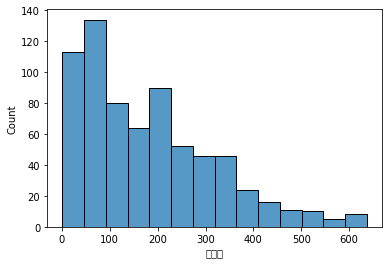

In [ ]:
import seaborn as sns
sns.histplot(y_train)   # y의 분포 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

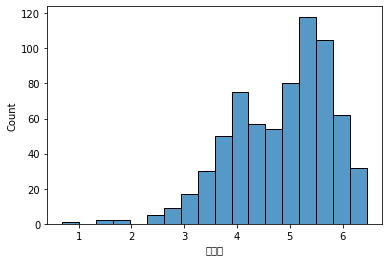

In [ ]:
log_y_train = np.log1p(y_train)
log_y_vali = np.log1p(y_vali)
sns.histplot(log_y_train)   # y의 분포 확인

In [ ]:
X_train['하늘상태'] = X_train['하늘상태'].astype(str)
X_train['강수형태'] = X_train['강수형태'].astype(str)
X_train['winter'] = X_train['winter'].astype(str)

X_vali['하늘상태'] = X_vali['하늘상태'].astype(str)
X_vali['강수형태'] = X_vali['강수형태'].astype(str)
X_vali['winter'] = X_vali['winter'].astype(str)

In [ ]:
X_train

,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,3,60.439189,22.972973,2.021622,0,0
116,20.526316,12.250000,3,59.459459,19.864865,1.972297,0,0
117,19.210526,11.875000,3,60.675676,27.756757,2.258784,0,0
118,17.052632,10.125000,4,71.148649,35.567568,2.427703,0,0


In [ ]:
data_train = pd.get_dummies(X_train)
data_vali = pd.get_dummies(X_vali)

In [ ]:
data_train

,일최고기온,일최저기온,습도,강수확률,풍속,하늘상태_1,하늘상태_2,하늘상태_3,하늘상태_4,강수형태_0,강수형태_1,winter_0,winter_1
0,29.052632,29.052632,46.959459,5.067568,1.439189,0,1,0,0,1,0,1,0
1,30.315789,30.315789,50.270270,5.337838,1.657432,0,1,0,0,1,0,1,0
2,29.947368,29.947368,59.932432,12.770270,1.747297,0,1,0,0,1,0,1,0
3,28.631579,28.631579,64.695946,20.675676,1.635811,0,0,1,0,1,0,1,0
4,26.684211,26.684211,64.324324,38.783784,3.034459,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20.263158,12.375000,60.439189,22.972973,2.021622,0,0,1,0,1,0,1,0
116,20.526316,12.250000,59.459459,19.864865,1.972297,0,0,1,0,1,0,1,0
117,19.210526,11.875000,60.675676,27.756757,2.258784,0,0,1,0,1,0,1,0
118,17.052632,10.125000,71.148649,35.567568,2.427703,0,0,0,1,1,0,1,0


In [ ]:
data_vali['강수형태_1'] = 0
data_vali['winter_1'] = 0

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(data_train)
scaled_vali = scaler.transform(data_vali)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
scaled_train.shape

(699, 13)

In [ ]:
#### SVR
svr_lin_reg = LinearSVR(random_state = 2021)
svm_ploy3_reg = SVR(kernel='poly', degree=3)
svm_rbf3_reg = SVR(kernel='rbf', degree=3)

In [ ]:
def get_rmse(y_test,pred):
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('RMSE: {0:.3f}'.format(rmse))

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    get_rmse(y_test, pred)

In [ ]:
for model in [svr_lin_reg, svm_ploy3_reg, svm_rbf3_reg]:
  get_model_predict(model, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 119.350
### SVR ###
RMSE: 142.107
### SVR ###
RMSE: 122.476


In [ ]:
from sklearn.model_selection import GridSearchCV
svr_lin_reg_0 = LinearSVR(random_state = 2021)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'max_iter': [1000, 10000]}
]

result = GridSearchCV(svr_lin_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=LinearSVR(random_state=2021),
             param_grid=[{'C': [0.01, 0.1, 1], 'max_iter': [1000, 10000]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 0.1, 'max_iter': 1000}

In [ ]:
svr_lin_reg_2 =  LinearSVR(random_state = 2021, C = 1, max_iter=1000)

get_model_predict(svr_lin_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### LinearSVR ###
RMSE: 119.350


In [ ]:
svm_ploy3_reg_0 = SVR(kernel='poly', degree=3)

param_grid = [
    {'C': [0.01,0.1, 1], 
     'gamma': [0.1, 0.001]}
]

result = GridSearchCV(svm_ploy3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.1, 0.001]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_ploy3_reg_2 =  SVR(kernel='poly',C = 1, gamma=0.1)

get_model_predict(svm_ploy3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 133.469


In [ ]:
svm_rbf3_reg_0 = SVR(kernel='rbf', degree=3)

param_grid = [
    {'C': [0.1, 1], 
     'gamma': [0.1, 0.01]}
]

result = GridSearchCV(svm_rbf3_reg_0, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5)
result.fit(scaled_train, log_y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'gamma': [0.1, 0.01]}],
             scoring='neg_mean_squared_error')

In [ ]:
result.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
svm_rbf3_reg_2 =  SVR(kernel='rbf', C = 0.1, gamma=0.1)

get_model_predict(svm_rbf3_reg_2, scaled_train, scaled_vali, log_y_train, log_y_vali, is_expm1=True)

### SVR ###
RMSE: 127.905


In [ ]:
#### test
y_test = final1_test['대여수']
X_test = final1_test.drop('대여수',axis=1, inplace=False)
log_y_test = np.log1p(y_test)

X_test['하늘상태'] = X_test['하늘상태'].astype(str)
X_test['강수형태'] = X_test['강수형태'].astype(str)
X_test['winter'] = X_test['winter'].astype(str)

data_test = pd.get_dummies(X_test)
data_test

,습도,풍속,강수확률,일최고기온,일최저기온,하늘상태_1,하늘상태_2,하늘상태_3,강수형태_0,강수형태_1,winter_0
0,72.668919,1.845270,23.932432,26.263158,18.125,0,0,1,1,0,1
1,77.567568,1.429730,25.972973,23.631579,16.750,0,0,1,1,0,1
2,73.716216,1.247973,5.743243,24.947368,16.000,0,1,0,1,0,1
3,71.317568,1.499324,5.810811,27.368421,17.375,0,1,0,1,0,1
4,71.925676,1.758108,15.810811,28.526316,18.125,0,0,1,1,0,1
5,71.216216,2.238514,20.472973,28.631579,18.750,0,0,1,1,0,1
6,71.216216,2.251351,20.067568,30.210526,20.000,0,0,1,1,0,1
7,78.716216,1.736486,28.581081,30.052632,21.125,0,0,1,1,0,1
8,77.736486,1.877703,14.054054,28.210526,20.625,0,1,0,1,0,1
9,73.716216,2.058108,2.364865,28.684211,19.625,1,0,0,1,0,1


In [ ]:
data_test['winter_1'] = 0
data_test['하늘상태_4'] = 0

In [ ]:
data_test = data_test[['습도', '풍속', '강수확률', '일최고기온', '일최저기온', '하늘상태_1', '하늘상태_2', '하늘상태_3', '하늘상태_4', 
           '강수형태_0', '강수형태_1', 'winter_0', 'winter_1']]

In [ ]:
scaled_test = scaler.transform(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
pred_test1 = svr_lin_reg_2.predict(scaled_test)
pred_test2 = svm_ploy3_reg_2.predict(scaled_test)
pred_test3 = svm_rbf3_reg_2.predict(scaled_test)

print(np.sqrt(mean_squared_error(np.expm1(pred_test1), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test2), np.expm1(log_y_test))))
print(np.sqrt(mean_squared_error(np.expm1(pred_test3), np.expm1(log_y_test))))

863.3526496871513
263.16659428630896
61.35165095113961


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.expm1(pred_test1), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test2), np.expm1(log_y_test)))
print(mean_absolute_error(np.expm1(pred_test3), np.expm1(log_y_test)))

848.2861652407913
235.98077758277276
46.397092253903864
